# TUGAS UAS (AI) DECESION TREE



*   NAMA : YULI PURWANTO
*   KELAS : IE.22.C1
*   NIM: 352210016
*   TUGAS : UAS




# Import Library

In [17]:
#import librarryy
import pandas as pd
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Membaca Data

In [4]:
#Baca data
data = {
    "Color": ["green","green","yellow","red","red","red","green","green","yellow","red","green","yellow","yellow","red"],
    "Outline": ["dashed","dashed","dashed","dashed","solid","solid","solid","dashed","solid","solid","solid","dashed","solid","dashed"],
    "Dot": ["no","yes","no","no","no","yes","no","no","yes","no","yes","yes","no","yes"],
    "Shape": ["triangle","triangle","square","square","square","triangle","square","triangle","square","square","square","square","square","triangle"]
}

data = pd.DataFrame(data)
df

,Color,Outline,Dot,Shape
0,green,dashed,no,triangle
1,green,dashed,yes,triangle
2,yellow,dashed,no,square
3,red,dashed,no,square
4,red,solid,no,square
5,red,solid,yes,triangle
6,green,solid,no,square
7,green,dashed,no,triangle
8,yellow,solid,yes,square
9,red,solid,no,square


# EDA

Shape Data : (14, 4)

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Color    14 non-null     int64
 1   Outline  14 non-null     int64
 2   Dot      14 non-null     int64
 3   Shape    14 non-null     int64
dtypes: int64(4)
memory usage: 580.0 bytes

Missing Value:
Color      0
Outline    0
Dot        0
Shape      0
dtype: int64

Distribusi Target:
Shape
0    9
1    5
Name: count, dtype: int64


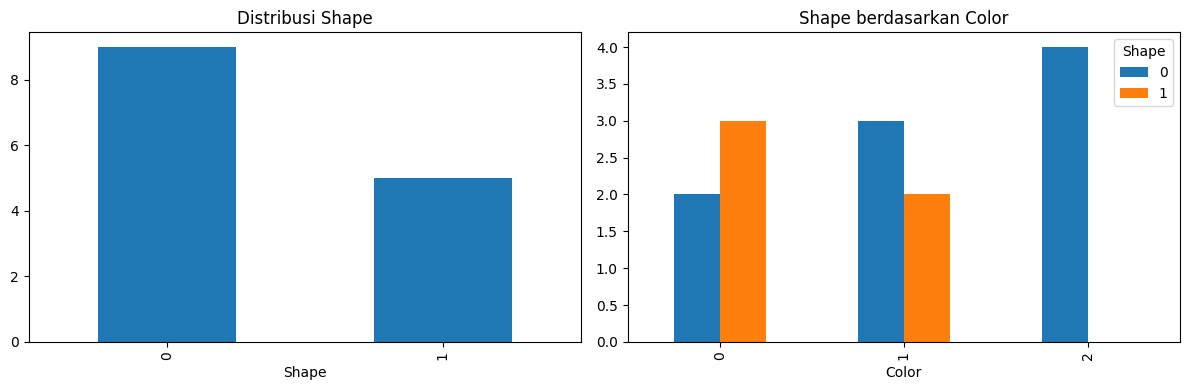

In [27]:
print("Shape Data :", df.shape)
print("\nInfo Data:")
df.info()

print("\nMissing Value:")
print(df.isnull().sum())

print("\nDistribusi Target:")
print(df["Shape"].value_counts())

# Visualisasi
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
df["Shape"].value_counts().plot(kind="bar")
plt.title("Distribusi Shape")

plt.subplot(1,2,2)
pd.crosstab(df["Color"], df["Shape"]).plot(kind="bar", ax=plt.gca())
plt.title("Shape berdasarkan Color")

plt.tight_layout()
plt.show()

# Membuat Definisi Entropy dan Gain

In [11]:
#Buat Definisi dan fungsii entropy ya.
def entropy(target_col):
    values, counts = np.unique(target_col, return_counts=True)
    entropy_val = 0
    for count in counts:
        p = count / sum(counts)
        entropy_val -= p * math.log2(p)
    return entropy_val



# Entropy total dataset
total_entropy = entropy(df["Shape"])
print("Entropy Total =", round(total_entropy, 3))



Entropy Total = 0.94


In [10]:
total_entropy = entropy(df["Shape"])
print("Entropy Total =", round(total_entropy, 3))

Entropy Total = 0.94


In [13]:
#Fungsi Information Gain
def info_gain(df, split_attr, target_attr):
    total_entropy = entropy(df[target_attr])
    values, counts = np.unique(df[split_attr], return_counts=True)

    weighted_entropy = 0
    for i in range(len(values)):
        subset = df[df[split_attr] == values[i]]
        weighted_entropy += (counts[i]/sum(counts)) * entropy(subset[target_attr])

    gain = total_entropy - weighted_entropy
    return gain

# Hitung Gain semua atribut
for col in ["Color", "Outline", "Dot"]:
    print(f"Gain({col}) =", round(info_gain(df, col, "Shape"), 3))


Gain(Color) = 0.247
Gain(Outline) = 0.152
Gain(Dot) = 0.048


# Membuat Definisi Pohon Keputusan

In [26]:
#Membuat Pohon Keputusannnnn
def id3(df, target_attr, attributes):
    # Jika semua target sama
    if len(np.unique(df[target_attr])) == 1:
        return np.unique(df[target_attr])[0]

    # Jika atribut habis
    if len(attributes) == 0:
        return df[target_attr].mode()[0]

    # Cari atribut dengan gain terbesar
    gains = [info_gain(df, attr, target_attr) for attr in attributes]
    best_attr = attributes[np.argmax(gains)]

    tree = {best_attr: {}}

    for value in np.unique(df[best_attr]):
        subset = df[df[best_attr] == value]
        subtree = id3(
            subset,
            target_attr,
            [attr for attr in attributes if attr != best_attr]
        )
        tree[best_attr][value] = subtree

    return tree


attributes = ["Color", "Outline", "Dot"]
decision_tree = id3(df, "Shape", attributes)
decision_tree


{'Color': {np.int64(0): {'Outline': {np.int64(0): np.int64(1),
    np.int64(1): np.int64(0)}},
  np.int64(1): {'Dot': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}},
  np.int64(2): np.int64(0)}}

# Data Preprocessing

In [25]:
#Melakukan encode text tu numerical , karena kalo buat model ya harus numeric bukan text yoo..
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

X = df.drop("Shape", axis=1)
y = df["Shape"]



# Data Modeling

In [23]:

# Membuat data training model (entropy)
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

# Data Visualization (Decesion Tree)

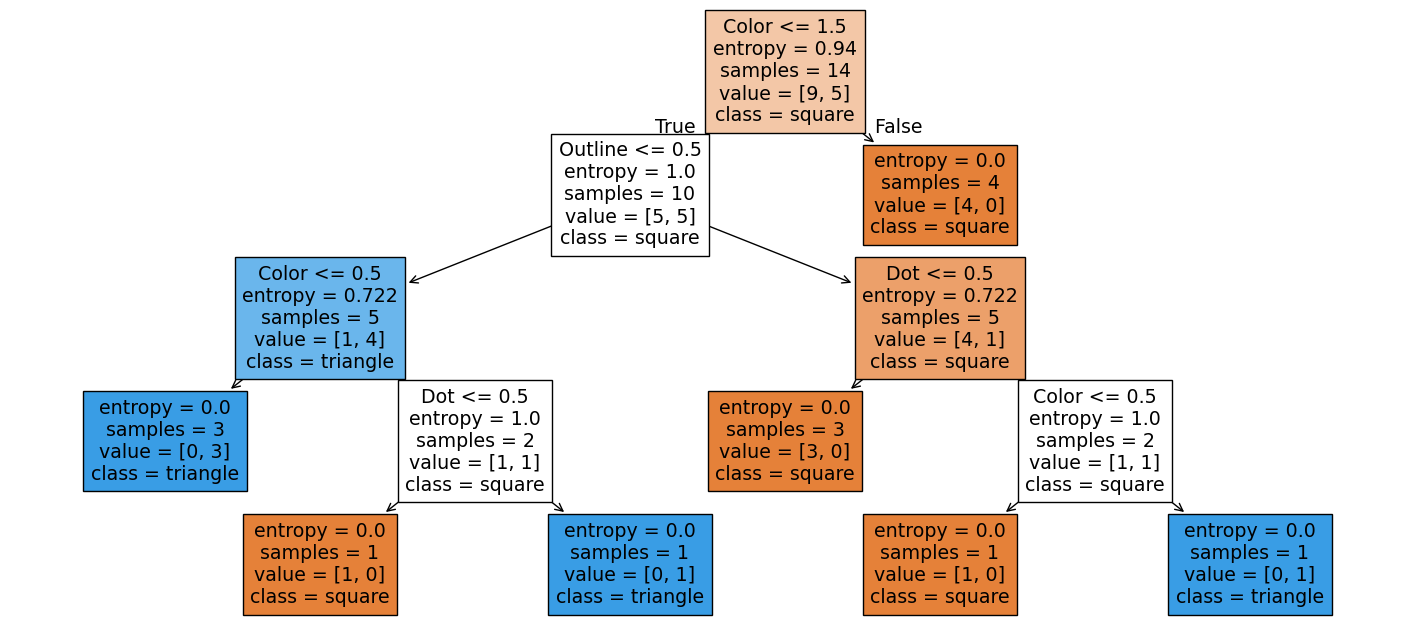

In [24]:
# mmebuaat plot dengan matplotlib untukkk membuat plot visualisasi pohon keputusan
plt.figure(figsize=(18,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["square", "triangle"],
    filled=True
)
plt.show()
